In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Upload dos dados e metadados
datai = pd.read_csv("gds1686.csv", sep=',', index_col = 0)
meta = pd.read_csv("meta-gds1686.csv", sep = ",", index_col = 0)

In [12]:
# Contagem do número de atributos e instâncias dos dados e metadados
print('Dados: ', datai.values.shape)
print('Metadados: ', meta.values.shape)

Dados:  (14010, 30)
Metadados:  (30, 4)


**Dados e metadados**

Os dados são compostos por 14010 instâncias (linhas) e 30 atributos (colunas).
Os metadados são compostos por 30 instâncias e 4 atributos.

Criou-se então a matriz de dados transposta, de forma a ter o mesmo número de atributos nos dados e metadados. As 30 instâncias correspondem às 30 moscas, submetidas às medições dos níveis de expressão dos genes nos diferentes ambientes. Os 14010 atributos são os genes estudados.

In [6]:
data=datai.transpose()
print(data)


          141200_at  141201_at  141202_at  141203_at  141204_at  141205_at  \
GSM95424    3.77628    5.64283    6.80354    5.42622    4.58124    5.94997   
GSM95425    3.44458    5.47795    7.01271    5.53965    4.55277    5.94535   
GSM95444    3.76067    5.53370    6.81637    5.38007    4.45829    5.97233   
GSM95324    3.38473    5.58603    6.66803    5.26991    4.45801    5.62635   
GSM95421    3.57696    5.60629    6.73312    5.18558    4.56932    5.79158   
GSM95423    3.71310    5.57885    6.96012    5.36280    4.45476    5.75519   
GSM95325    3.59374    5.60380    6.55975    5.06871    4.47072    5.63485   
GSM95420    3.68243    5.40856    6.91156    5.31143    4.60259    5.84344   
GSM95422    3.71822    5.53217    6.53144    5.24742    4.68283    5.89039   
GSM95290    3.95261    5.55998    7.19880    5.51060    4.74907    6.27263   
GSM95292    3.67817    5.37299    7.10604    5.55732    4.73757    6.38052   
GSM95293    3.57283    5.60045    6.99170    4.92440    4.60691 

In [11]:
# Missing Values 
print("Valores em falta nos dados:")
print(data.isnull().sum().sum())
print("Valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta nos dados:
0
Valores em falta nos metadados:
0


In [13]:
# Descrição dos atributos nos dados
print("Tipos de atributos nos dados:")
print(data.dtypes)

Tipos de atributos nos dados:
141200_at               float64
141201_at               float64
141202_at               float64
141203_at               float64
141204_at               float64
                         ...   
AFFX-TrpnX-M_at         float64
AFFX-YEL002c/WBP1_at    float64
AFFX-YEL018w/_at        float64
AFFX-YEL021w/URA3_at    float64
AFFX-YEL024w/RIP1_at    float64
Length: 14010, dtype: object


In [64]:
# Missing Values in metadataint("Total de valores em falta nos metadados:")
print(meta.isnull().sum().sum())

Valores em falta para cada atributo dos metadados:
sample         0
individual     0
time           0
description    0
dtype: int64

Total de valores em falta nos metadados:
0


In [14]:
# Descrição dos atributos nos metadados
print("Tipos de atributos nos metadados:")
print(meta.dtypes)

Tipos de atributos nos metadados:
sample         object
protocol       object
time           object
description    object
dtype: object


**Data Understanding**

Este estudo pretendia investigar os efeitos da privação do sono no cérebro de moscas fêmeas virgens da espécie Drosophila melanogaster, através da análise de variações na expressão génica destas. Os genes estudados tinham já sido documentados como sendo regulados de forma diferente durante períodos de sono ou atividade. 

Obtiveram-se informações sobre os processos moleculares dinâmicos que são alterados durante a vigília e durante o sono. Para tal, realizou-se um estudo de perfil de expressão de RNA examinando-se mudanças temporais no cérebro da Drosophila em relação à duração do sono ou vigília anteriores. O projeto experimental permitiu determinar se os genes identificados como regulados diferencialmente entre o sono e a vigília eram regulados para cima ou para baixo nesses estados.

Parte dos dados dizem respeito ao controlo dos processos circadianos, matando-se animais em quatro pontos de tempo (0, 2, 4 e 6 horas) desde o início do período de descanso consolidado [Zeitgeber Time (ZT) 14)] sob duas condições: privação de sono e sono espontâneo. O ponto de tempo “0” trata-se do controlo do período de sono.

O restantes dados surgiram com o intuito de controlar o efeito do estimulação das moscas durante a privação de sono, sendo referentes à estimulação manual das moscas durante o seu período ativo de ZT10-ZT14. Neste conjunto de dados, foram analisadas moscas no ponto de tempo “0”/ZT10 (controlo) e ao fim de 4 horas/ZT14, para moscas perturbadas e não perturbadas.

Nos dados, cada atributo representa um dos genes em estudo e cada instância corresponde a uma das amostras. Assim, cada linha terá 14010 valores de expressão de cada gene (cada célula é representada por um dado do tipo *float64*).
 
Já nos metadados, os atributos são: a amostra, o ambiente a que foi sujeita, o período de sujeição ao ambiente e a descrição de cada instância. Estes atributos são do tipo *object*. Os meta-dados possuem quatro variáveis ("sample", "protocol", "time", "description"), mas apenas duas possuem informação relevante para análise dos dados e geração dos modelos de machine learning: "protocol" e "time".

**Data Processing**

Neste dataset, as amostras estão agrupadas em ambientes de recolha. Tendo isto em conta e o facto de serem apenas 30, não se considerou pertinente proceder à remoção de outliers. Também não se verifica a existência de valores nulos.
Como todos os dados estão representados na mesma escala (nível de expressão génica) e o número de atributos é igual para todas as amostras, não houve necessidade de realizar normalização nem balaceamento dos dados.

Este dataset apresenta um elevado valor de atributos (colunas) - 14010 - correspondentes aos diferentes genes estudados. Uma análise de PC (Principal Components) permitirá reduzir este número, considerando apenas os atributos que conseguem explicar a maioria da variabilidade dos dados. Por exemplo, se se aplicar uma PCA que permita explicar 90% desta variabilidade, reduzir-se-á o número de atributos (genes a analisar) àqueles que a explicam.

[2.39691084e-01 1.58470120e-01 7.16860362e-02 4.50942771e-02
 3.79773784e-02 3.63413360e-02 3.27745431e-02 2.90720793e-02
 2.77946897e-02 2.40645040e-02 2.23265235e-02 2.06159151e-02
 1.96604660e-02 1.90771731e-02 1.86079279e-02 1.76392933e-02
 1.72669578e-02 1.62588555e-02 1.57998798e-02 1.52603008e-02
 1.47597314e-02 1.43374509e-02 1.40301536e-02 1.31051139e-02
 1.25497475e-02 1.23073635e-02 1.19131001e-02 1.12827570e-02
 1.02352418e-02 3.84708172e-34]
0.702966047660038


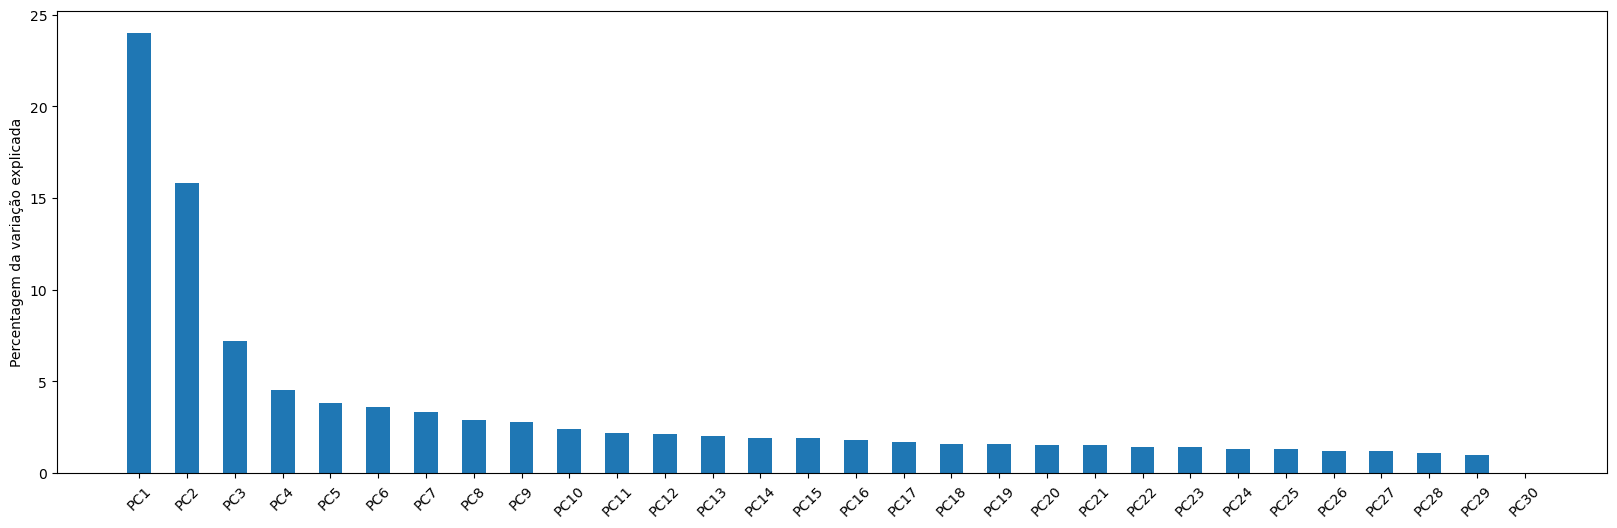

0.702966047660038 9
0.7252925711182634 10
0.7459084862141241 11
0.7655689522059183 12
0.7846461252670309 13
0.8032540531492964 14
0.8208933464185276 15
0.8381603042439876 16
0.8544191596971645 17
0.8702190394635029 18
0.8854793402199539 19
0.9002390716175565 20
0.914576522553859 21
0.9286066761961072 22
0.9417117901049407 23
0.9542615375943395 24
0.9665689011365898 25
0.9784820012019473 26
0.9897647582223359 27
0.9999999999999999 28
0.9999999999999999 29


In [64]:
n=30 # 30 amostras para análise
pca = PCA(n_components=n)
pca.fit(data_scale)                                                           # media e desvio
x_reduced = pca.transform(data_scale)   
principalComponents = pca.fit_transform(x_reduced)# escala
print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:10]))                          # 90% da variabilidade

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)


plt.show()

soma=0
for i in range(len(pca.explained_variance_ratio_)):
    soma+=pca.explained_variance_ratio_[i]
    if soma>=0.70:
        print(soma,i)



O gráfico das percentagens de variabilidade explicadas por PC permite inferir que a partir dos 10 primeiros componentes a variabilidade adicional explicada por cada novo componente principal é muito baixa. Os 10 primeiros PC descrevem 72.5% da variabilicade, enquanto que os "standard" 90% de variabilidade são atingidos com 20 PC's.

COMO SABER QUAIS OS ATRIBUTOS QUE CONSTITUEM CADA PC??????
E COMO SELECIONAR APENAS ESSES PARA A CRIAÇÃO DOS MODELOS?????

In [65]:
#descricao=data.describe()

In [47]:
#print(descricao)


       141200_at  141201_at  141202_at  141203_at  141204_at  141205_at  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    3.607873   5.489350   6.952435   5.249813   4.599524   5.954323   
std     0.134341   0.091277   0.200513   0.213595   0.109908   0.211262   
min     3.337230   5.314440   6.531440   4.644220   4.388890   5.548860   
25%     3.499017   5.413712   6.823830   5.186327   4.506510   5.808288   
50%     3.596040   5.497505   6.991820   5.280945   4.604750   5.947660   
75%     3.696905   5.556718   7.126535   5.358195   4.680313   6.071495   
max     3.952610   5.642830   7.231070   5.571400   4.795950   6.380520   

       141206_at  141207_at  141208_at  141209_at  ...  AFFX-ThrX-3_at  \
count  30.000000  30.000000  30.000000  30.000000  ...       30.000000   
mean    6.990018   4.392433   5.405541   7.439440  ...        4.944844   
std     0.125764   0.250060   0.193319   0.134838  ...        1.395989   
min     6.773590   3.662410 

**SECÇAO 2**

Análise estatística

In [82]:
from sklearn.cluster import KMeans

k=4
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, data['hora'], rownames=['clusters'] )

hora,hour 1.5,hour 10,hour 24,hour 4
clusters,,,,
0,0,2,6,0
1,6,7,3,7
2,4,2,3,4
3,2,1,0,1


**SECÇAO 3**

In [108]:
input_data = data.values
output_data = meta['time'].values
input_sc = preprocessing.scale(input_data)
print(len(input_sc))
indices = np.random.permutation(len(input_data))
indices

train_in = input_sc[indices[:-16]]                #divisao entre dados de treino e dados de teste
train_out = output_data[indices[:-16]]
test_in  = input_sc[indices[-16:]]
test_out = output_data[indices[-16:]]

48


K-neighbors

In [109]:
knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds_knn = knn.predict(test_in)
print("Valores previstos: ", preds_knn)
print("Valores reais: " , test_out)
from sklearn.metrics import accuracy_score
accuracy_score(preds_knn, test_out)

Valores previstos:  ['hour 10' 'hour 4' 'hour 10' 'hour 10' 'hour 10' 'hour 10' 'hour 1.5'
 'hour 10' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5'
 'hour 1.5' 'hour 10' 'hour 24']
Valores reais:  ['hour 4' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 1.5'
 'hour 24' 'hour 24' 'hour 4' 'hour 24' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.25

Tree descision

In [110]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Valores previstos: ", preds_tree)
print("Valores reais: " , test_out)
sum(preds_tree == test_out) / len(preds_tree)

Valores previstos:  ['hour 4' 'hour 4' 'hour 10' 'hour 10' 'hour 24' 'hour 4' 'hour 10'
 'hour 24' 'hour 10' 'hour 4' 'hour 10' 'hour 10' 'hour 1.5' 'hour 10'
 'hour 24' 'hour 10']
Valores reais:  ['hour 4' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 1.5'
 'hour 24' 'hour 24' 'hour 4' 'hour 24' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.625

Regressao Logistica

In [111]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver = "lbfgs", multi_class = "auto", max_iter = 1000)
logistic = logistic.fit(train_in, train_out)
preds_logr = logistic.predict(test_in)

print("Valores previstos: " , preds_logr)
print("Valores reais: " , test_out)
sum(preds_logr == test_out) / len(preds_logr)

Valores previstos:  ['hour 1.5' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 10'
 'hour 24' 'hour 24' 'hour 1.5' 'hour 10' 'hour 1.5' 'hour 1.5' 'hour 10'
 'hour 10' 'hour 24']
Valores reais:  ['hour 4' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 1.5'
 'hour 24' 'hour 24' 'hour 4' 'hour 24' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.5625

SVM

In [112]:
from sklearn import svm

model_svm = svm.SVC(gamma=0.001, C=100.)
model_svm = model_svm.fit(train_in, train_out)
preds_svm = model_svm.predict(test_in)

print("Valores previstos: " , preds_svm)
print("Valores reais: " , test_out)
sum(preds_svm == test_out) / len(preds_svm)

Valores previstos:  ['hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5'
 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5'
 'hour 1.5' 'hour 1.5' 'hour 1.5' 'hour 1.5']
Valores reais:  ['hour 4' 'hour 4' 'hour 10' 'hour 24' 'hour 24' 'hour 4' 'hour 1.5'
 'hour 24' 'hour 24' 'hour 4' 'hour 24' 'hour 24' 'hour 1.5' 'hour 10'
 'hour 4' 'hour 10']


0.125

Comparacao dos modelos

In [113]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree_model, input_sc, output_data, cv = 5)
print(scores_tree)
print(scores_tree.mean())

[0.5        0.8        0.6        0.44444444 0.55555556]
0.5799999999999998


In [114]:
scores_log = cross_val_score(logistic, input_sc, output_data, cv = 5)
print(scores_log)
print(scores_log.mean())

[0.5        0.6        0.8        0.66666667 0.55555556]
0.6244444444444446


In [115]:
scores_svm = cross_val_score(model_svm, input_sc, output_data, cv = 5)
print(scores_svm)
print(scores_svm.mean())

[0.3        0.1        0.2        0.11111111 0.22222222]
0.1866666666666667
